In [33]:
from grenmlin import simulator, grn
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import visualize, get_input_signals, test_inputs

## 1:N DEMUX

Generalized MUX structure. Boolean formula:
$$ Y_1 = X_1 \cdot \overline S_1 \cdot \overline S_2 \cdot \dots \cdot \overline S_{\log_2{N}}, $$
$$ Y_2 = X_1 \cdot S_1 \cdot \overline S_2 \cdot \dots \cdot \overline S_{\log_2{N}}, $$
$$ \vdots $$
$$ Y_N = X_1 \cdot S_1 \cdot S_2 \cdot \dots \cdot S_{\log_2{N}} $$

In [34]:
def make_demux(N):
    # Check if N is power of 2
    if (N < 2) or not (N and (N & (N - 1)) == 0):
        raise ValueError("N must be a power of 2 and larger than 1 (e.g., 2, 4, 8, 16...)")
    
    num_select_lines = int(np.log2(N))

    # Initialize the GRN
    my_grn = grn.grn()

    # Add input species X1 and S1, S2, ..., Slog2(N)
    my_grn.add_input_species("X1")
    for i in range(1, num_select_lines + 1):
        my_grn.add_input_species(f"S{i}")

    # Add output species for each Y_i
    for i in range(1, N + 1):
        my_grn.add_species(f"DEMUX{i}", 0.1)

    # DEMUX logic
    for i in range(1, N + 1):
        # Determine binary representation
        binary_select = f"{i - 1:0{num_select_lines}b}"[::-1]
        
        # Define regulators
        regulators = [{'name': 'X1', 'type': 1, 'Kd': 5, 'n': 2}]
        for j, bit in enumerate(binary_select):
            regulators.append({
                "name": f"S{j + 1}",
                "type": 1 if bit == "1" else -1,
                "Kd": 5,
                "n": 3
            })

        print(regulators) # TODO DELETE
        
        # Output gene for DEMUX_i
        products = [{'name': f"DEMUX{i}"}]

        # Add the gene to the GRN
        my_grn.add_gene(10, regulators, products)

    # Plot the network
    my_grn.plot_network()

    # Generate input signals
    inputs = get_input_signals(2, 100)

    # Simulate the GRN
    T, Y = simulator.simulate_sequence(my_grn, inputs, t_single = 250, plot_on=False)

    # Visualize the results
    visualize(T, Y, my_grn)

    return my_grn

[{'name': 'X1', 'type': 1, 'Kd': 5, 'n': 2}, {'name': 'S1', 'type': -1, 'Kd': 5, 'n': 3}, {'name': 'S2', 'type': -1, 'Kd': 5, 'n': 3}]
[{'name': 'X1', 'type': 1, 'Kd': 5, 'n': 2}, {'name': 'S1', 'type': 1, 'Kd': 5, 'n': 3}, {'name': 'S2', 'type': -1, 'Kd': 5, 'n': 3}]
[{'name': 'X1', 'type': 1, 'Kd': 5, 'n': 2}, {'name': 'S1', 'type': -1, 'Kd': 5, 'n': 3}, {'name': 'S2', 'type': 1, 'Kd': 5, 'n': 3}]
[{'name': 'X1', 'type': 1, 'Kd': 5, 'n': 2}, {'name': 'S1', 'type': 1, 'Kd': 5, 'n': 3}, {'name': 'S2', 'type': 1, 'Kd': 5, 'n': 3}]


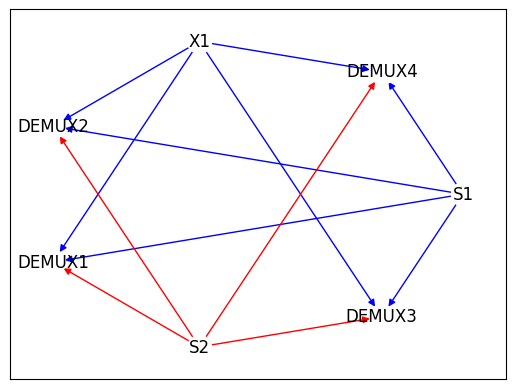

ValueError: not enough values to unpack (expected 7, got 6)

In [35]:
make_demux(4)